In [47]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import networkx as nx

In [48]:
N = 10000

In [49]:
np.random.seed(0)
f = np.random.randint(0, N, size = N)

In [50]:
def image_size(f):
    return len(set(f))

In [51]:
image_size(f)

6334

In [52]:
def compose(f, g):
    n = len(f)
    result = np.zeros(n, dtype='int64')
    for i in range(n):
        result[i] = f[g[i]]
    return result

In [53]:
f2 = compose(f, f)

In [54]:
image_size(f2)

4720

In [55]:
image_sizes = []
iterates = []
current_f = f
for i in range(1000):
    iterates.append(current_f)
    image_sizes.append(image_size(current_f))
    current_f = compose(f, current_f)

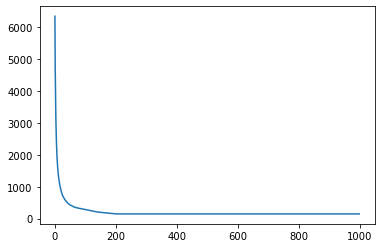

In [56]:
plt.plot(image_sizes)

In [41]:
print(image_sizes[-1])
print(np.sqrt(N))

284
100.0


In [42]:
def inverses(f):
    n = len(f)
    result = {}
    for i in range(n):
        result[i] = []
        for j in range(n):
            if f[j] == i:
                result[i].append(j)   
    return result

def ancestor_tree(finv, y):
    return ancestor_tree_helper(finv, y, [])

def ancestor_tree_helper(finv, y, seen):
    if y in seen:
        return y
    seen.append(y)
    if len(finv[y]) == 0:
        return y
    else:
        return [y, [ancestor_tree_helper(finv, x, seen) for x in finv[y]]]

In [13]:
finv = inverses(f)
trees = [ancestor_tree(finv, i) for i in range(N)]

KeyboardInterrupt: 

In [ ]:
trees

In [ ]:
def construct_tree(tree):
    return construct_tree_helper(tree, nx.DiGraph())

def construct_tree_helper(tree, G):
    if type(tree) == int:
        G.add_node(tree)
    else:
        assert len(tree) == 2
        current = tree[0]
        G.add_node(current)
        for ancestor in tree[1]:
            construct_tree_helper(ancestor, G)  
            if type(ancestor) == int:
                G.add_edge(current, ancestor)
            else:
                G.add_edge(current, ancestor[0])
    return G

In [ ]:
tree_graphs = [construct_tree(tree) for tree in trees]

In [ ]:
nx.draw(tree_graphs[4])

In [ ]:
largest_tree_index = np.argmax([len(str(tree)) for tree in trees])

In [ ]:
nx.draw(tree_graphs[largest_tree_index])

In [ ]:
iterate_100 = current_f
inverse_iterate_100 = inverses(iterate_100)

In [ ]:
G = nx.DiGraph()
# nodes = [j for j in range(N) if len(inverse_iterate_100[j]) > 0]
nodes = [j for j in range(N)]
G.add_nodes_from(nodes)
G.add_edges_from([(i, iterate_100[i]) for i in nodes])

In [ ]:
nx.draw_spring(G, node_size=2)

In [14]:
# current number remaining = x
# next step not in range: n * (1 - (1 - 1/n)^{x}) = n * e^-{x / n}
# next step in range: x - n * e^-{x/n}


# next step: x * (1 - (1 - 1 / n)^{x n}) = x * (1 - e^-x)


# (1 - 1 / 1000)^1000 = 1/e
# (1 - 1 / 1000)^((1 - 1/e)*1000) = e^{-(1 - 1/e)}

In [57]:
# x_i is fraction of range remaining at step i = 1
def iterate(fraction_of_range):
    return 1 - np.power(np.e, -fraction_of_range)

In [58]:
current_fraction_of_range = 1
iterates = []
for i in range(1000):
    iterates.append(current_fraction_of_range)
    current_fraction_of_range = iterate(current_fraction_of_range)

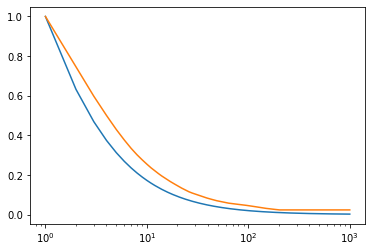

In [69]:
plt.xscale("log")
plt.plot(np.asarray(range(len(iterates))) + 1, iterates)
# let's compare with experiment!
experimental_range_fractions = np.asarray(image_sizes)/image_sizes[0]
plt.plot(np.asarray(range(len(iterates))) + 1, experimental_range_fractions)

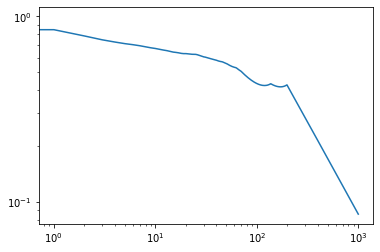

In [70]:
plt.xscale("log")
plt.yscale("log")
plt.plot(np.asarray(iterates)/np.asarray(experimental_range_fractions))

In [77]:
np.argmax(np.diff(np.asarray(experimental_range_fractions)) == 0)

198

In [ ]:
np.power((1 - 1 / 1000), 632)